# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('dados/alucar.csv')

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [3]:
alucar = pd.read_csv('dados/alucar.csv')

In [4]:
print('Quantidade de Linha e Colunas :{}'.format(alucar.shape))

Quantidade de Linha e Colunas :(24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
print(sns.__version__)

0.11.1


<AxesSubplot:xlabel='mes', ylabel='vendas'>

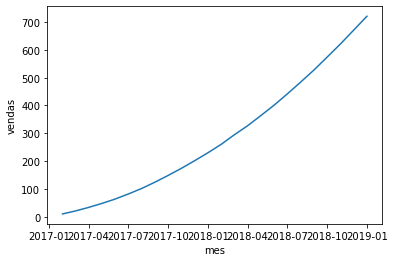

In [10]:
sns.lineplot(x='mes', y='vendas', data =alucar)

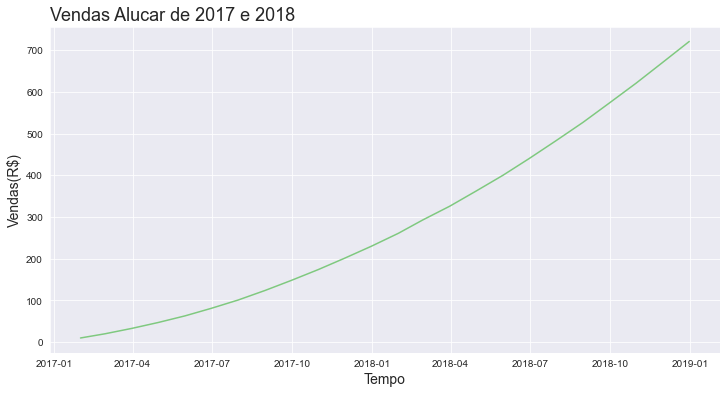

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data =alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas(R$)', fontsize = 14)
ax = ax

In [12]:
alucar['aumento'] = alucar['vendas'].diff()

In [13]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


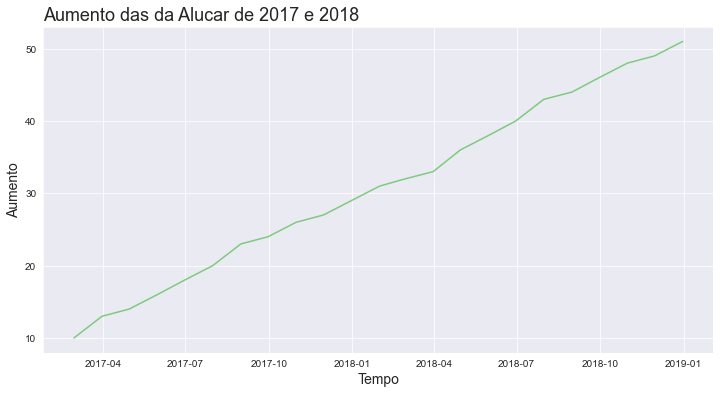

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data =alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data =dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

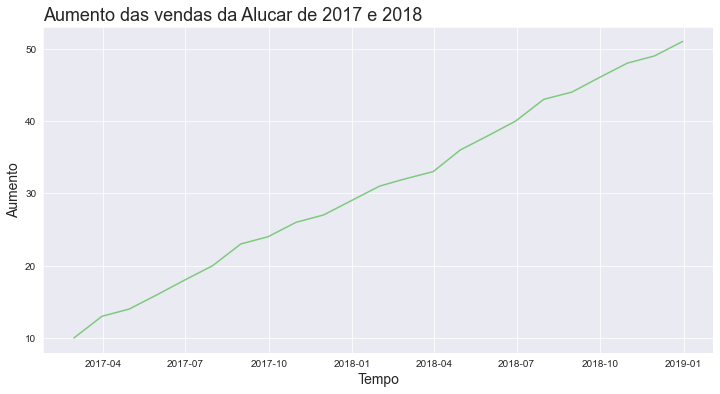

In [16]:
plotar('Aumento das vendas da Alucar de 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


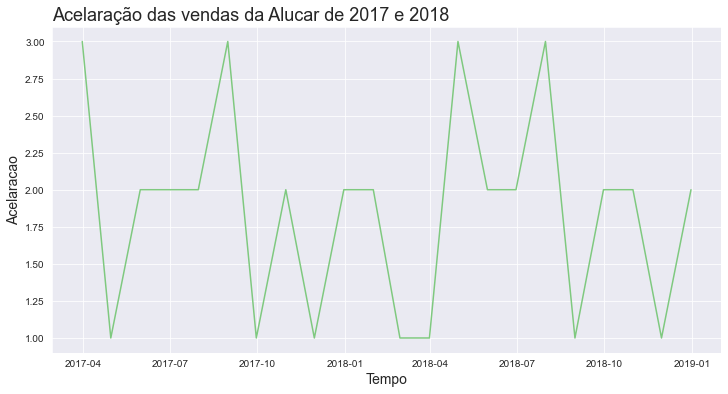

In [18]:
plotar('Acelaração das vendas da Alucar de 2017 e 2018','Tempo','Acelaracao','mes','aceleracao',alucar)

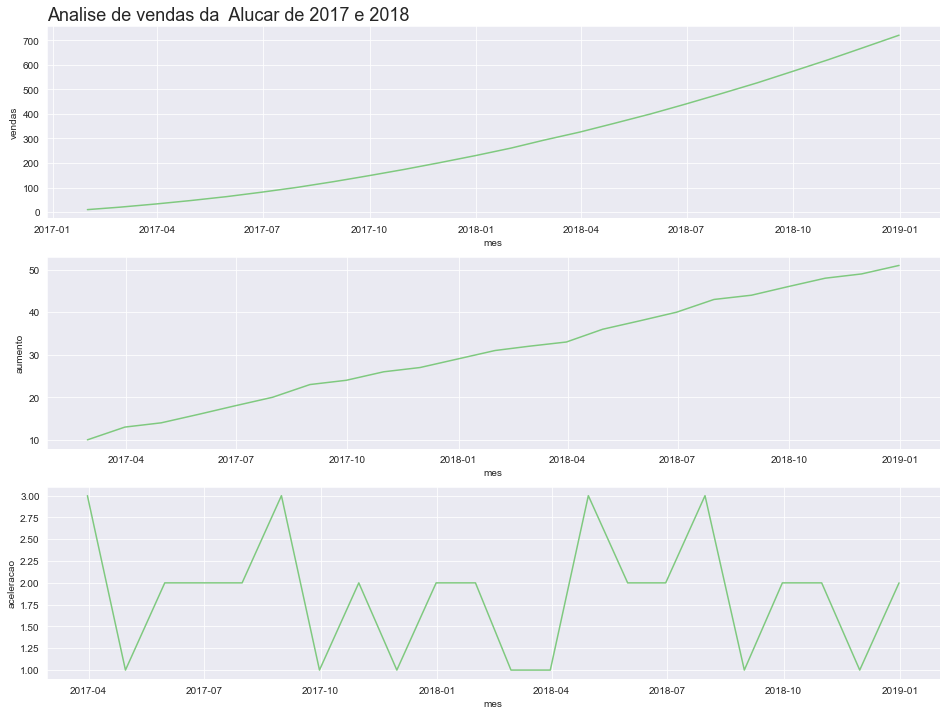

In [19]:
plt.figure(figsize =(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da  Alucar de 2017 e 2018', fontsize = 18, loc ='left')
sns.lineplot(x='mes', y='vendas', data =alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data =alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data =alucar)
ax=ax

In [20]:
def plot_comparacao(x, y1,y2 ,y3,dataset, titulo):
    plt.figure(figsize =(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc ='left')
    sns.lineplot(x= x, y= y1, data =dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data =dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x= x, y=y3, data = dataset)
    ax=ax

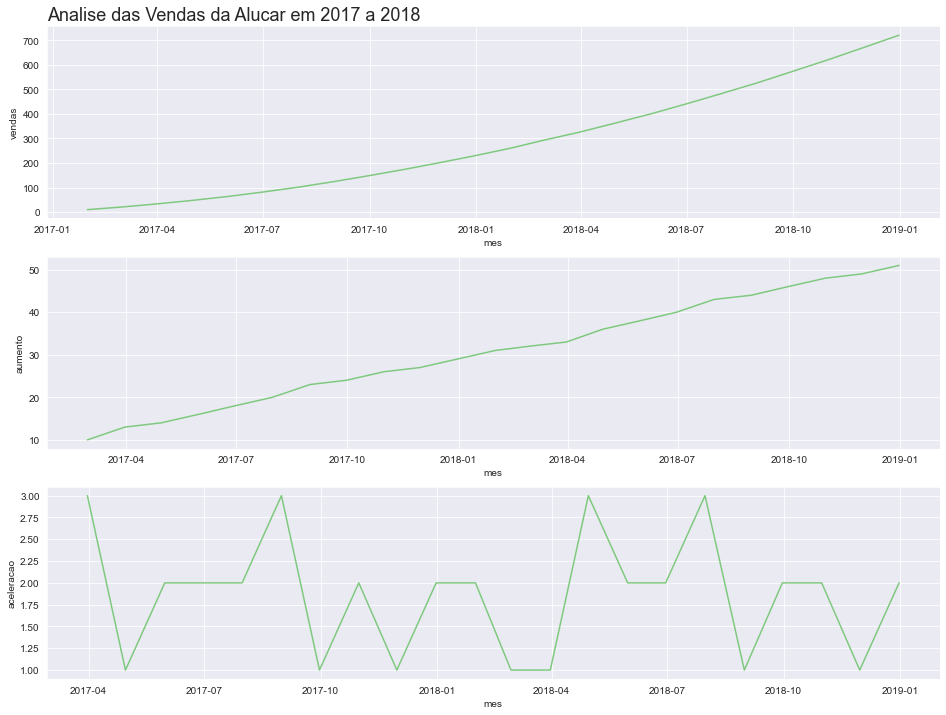

In [21]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Analise das Vendas da Alucar em 2017 a 2018' )

In [22]:
from pandas.plotting import autocorrelation_plot

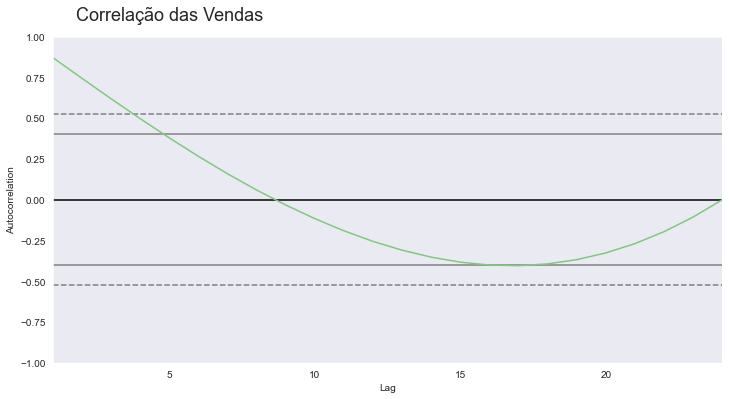

In [23]:
ax = plt.figure(figsize= (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x= 0.26 , y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

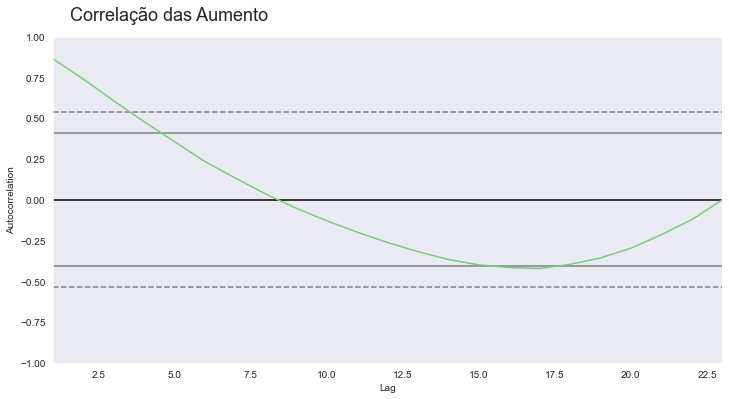

In [24]:
ax = plt.figure(figsize= (12,6))
ax.suptitle('Correlação das Aumento', fontsize = 18, x= 0.26 , y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

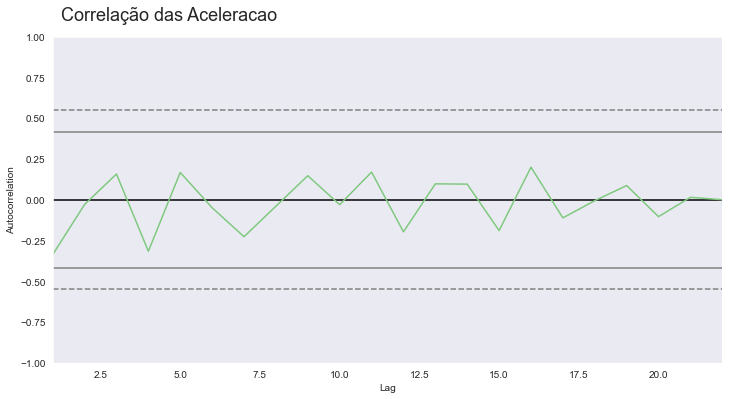

In [25]:
ax = plt.figure(figsize= (12,6))
ax.suptitle('Correlação das Aceleracao', fontsize = 18, x= 0.26 , y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinante da newsletter

In [26]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print('Quantidade de Linha e Colunas :{}'.format(assinantes.shape))
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de Linha e Colunas :(24, 2)
Quantidade de dados nulos: 0


In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [30]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [31]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


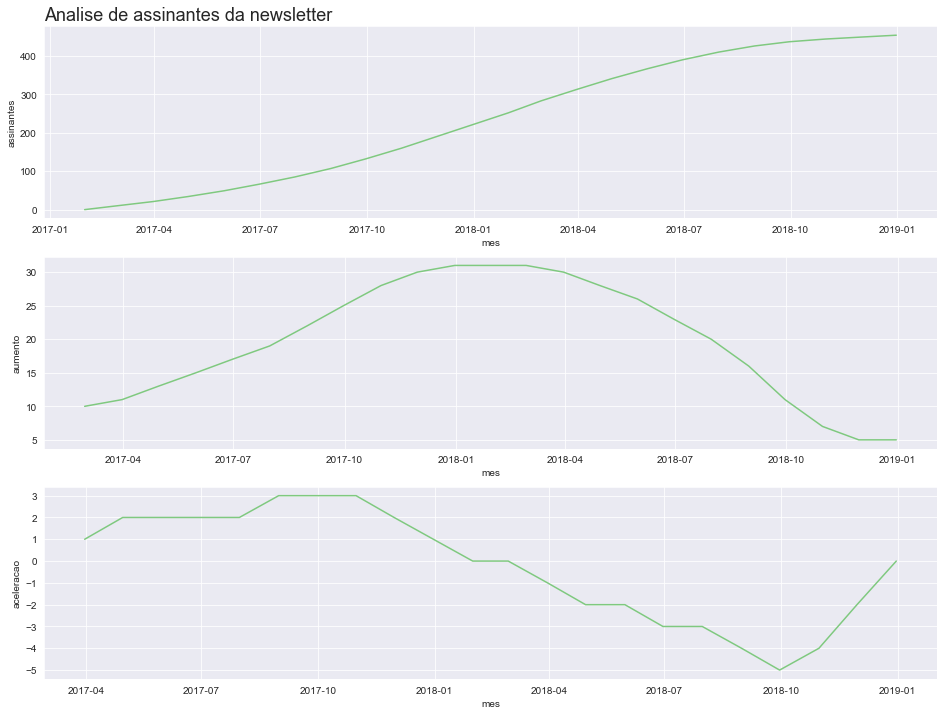

In [32]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Analise de assinantes da newsletter')

# Chocolura  - Analisando as vendas

In [33]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [34]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
print('Quantidade de linhas e coluna ', chocolura.shape)
print('Quantidade  de dados nulos', chocolura.isna().sum().sum())

Quantidade de linhas e coluna  (24, 2)
Quantidade  de dados nulos 0


In [36]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


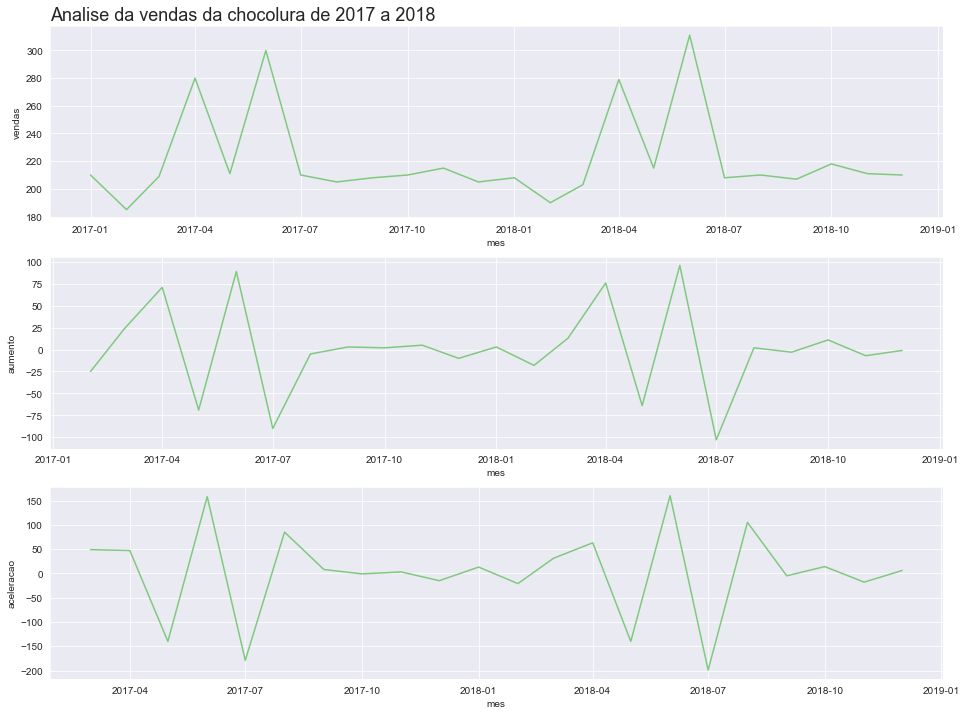

In [37]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Analise da vendas da chocolura de 2017 a 2018')

# Chocolura - Vendas diarias (Outubro e Novembro)

In [38]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [39]:
print('Quantidade de linhas e coluna ', vendas_por_dia.shape)
print('Quantidade  de dados nulos', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e coluna  (61, 2)
Quantidade  de dados nulos 0


In [40]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [41]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [42]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head(60)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
5,2018-10-06,18,-33.0,-34.0
6,2018-10-07,20,2.0,35.0
7,2018-10-08,50,30.0,28.0
8,2018-10-09,53,3.0,-27.0
9,2018-10-10,56,3.0,0.0


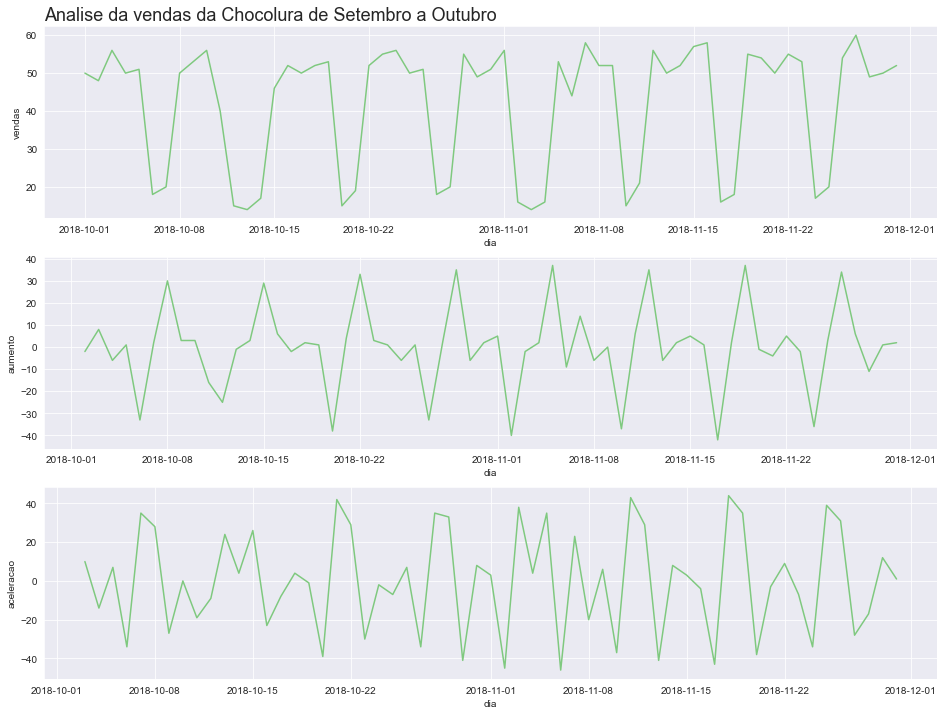

In [43]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Analise da vendas da Chocolura de Setembro a Outubro')

## Analisando a Sazonalidade

In [44]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [45]:
vendas_por_dia.head(60)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


In [46]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [47]:
dias_traduzidos = {'Monday' : 'Segunda' , 'Tuesday' : 'Terca', 'Wednesday' : 'Quarta', 'Thursday' : 'Quinta',
                   'Friday' : 'Sexta', 'Saturday' : 'Sabado', 'Sunday' : 'Domingo'}

In [48]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terca
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


## Agrupando os dias

In [49]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-49-50062ad17e95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [50]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


## Correlação das vendas diárias

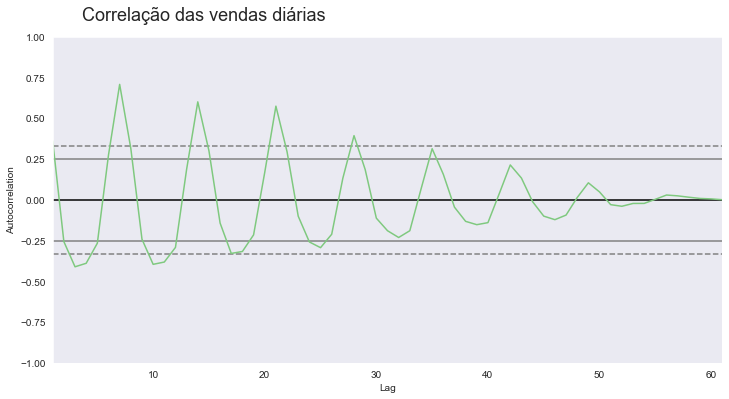

In [51]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x=0.3 , y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

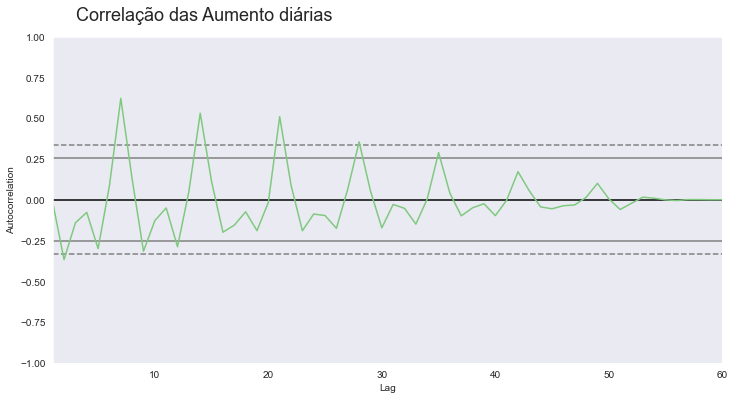

In [52]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aumento diárias', fontsize = 18, x=0.3 , y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

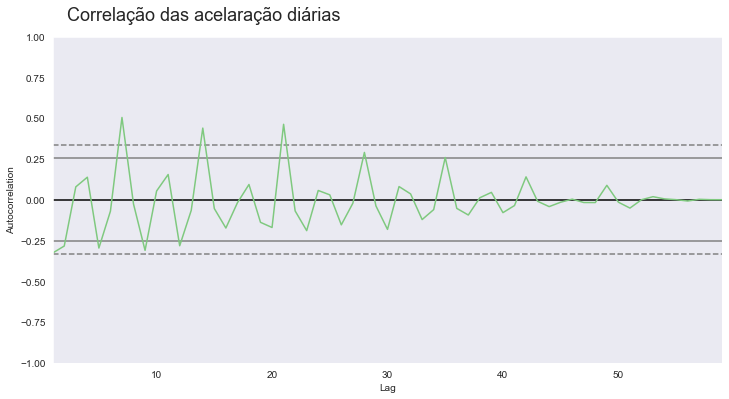

In [53]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das acelaração diárias', fontsize = 18, x=0.3 , y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Analise de Vendas

In [54]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [55]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [56]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [57]:
print('Quantidade de linha e colunas', cafelura.shape)
print('Quantidade de dados nulos', cafelura.isna().sum().sum())

Quantidade de linha e colunas (24, 2)
Quantidade de dados nulos 0


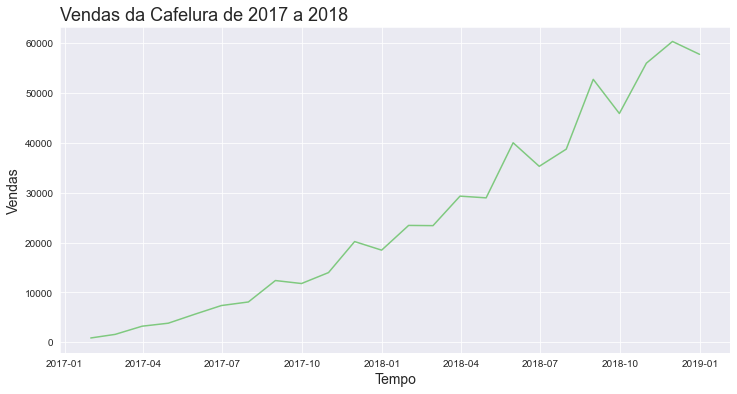

In [58]:
plotar('Vendas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

In [59]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [60]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [61]:
cafelura['vendaas_normalizada'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura

,mes,vendas,vendaas_normalizada
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


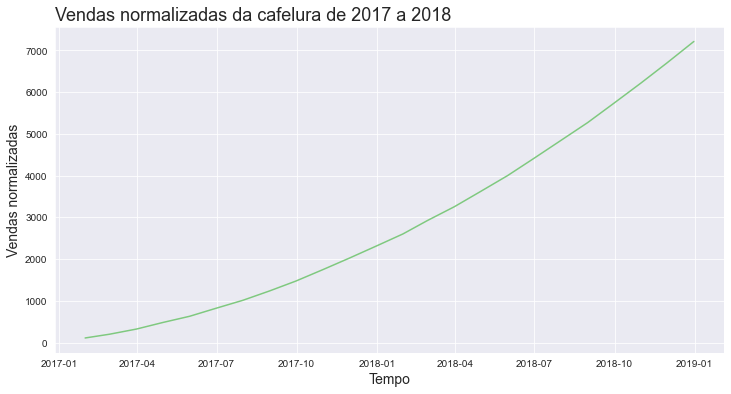

In [64]:
plotar('Vendas normalizadas da cafelura de 2017 a 2018',
      'Tempo', 'Vendas normalizadas', 'mes', 'vendaas_normalizada', cafelura)

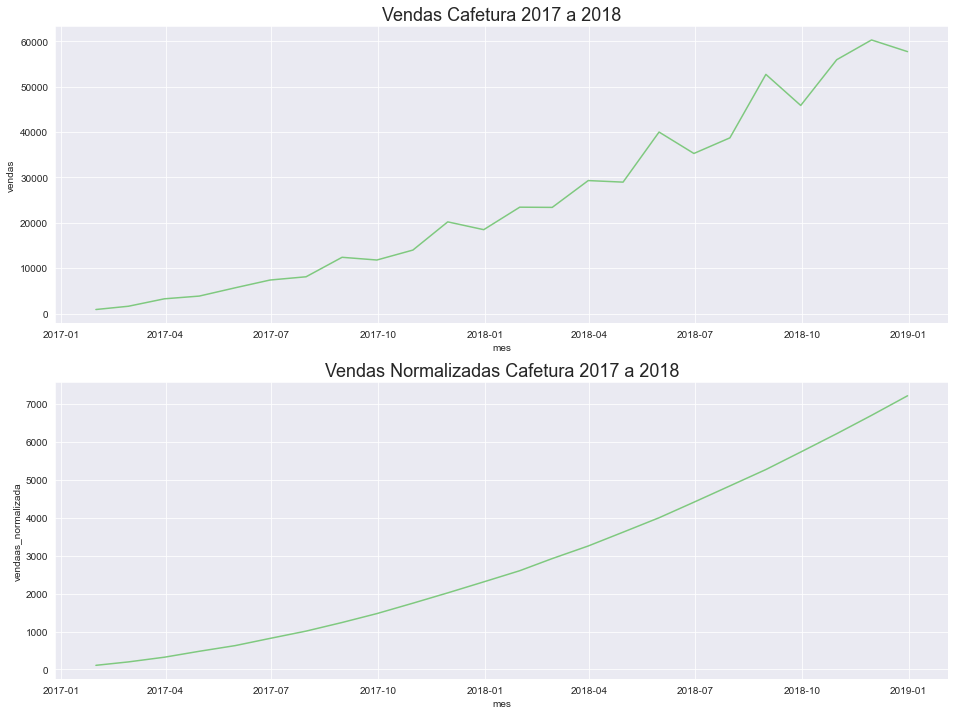

In [67]:
plt.figure(figsize =(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafetura 2017 a 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafetura 2017 a 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendaas_normalizada', data = cafelura)
ax = ax 

# Statsmodels

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

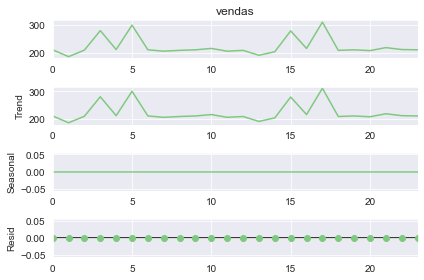

In [71]:
resultado = seasonal_decompose(chocolura['vendas'], period =1)
ax = resultado.plot()

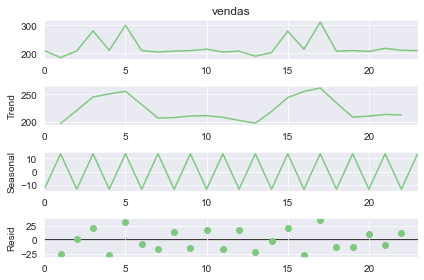

In [72]:
resultado = seasonal_decompose(chocolura['vendas'], period =2)
ax = resultado.plot()

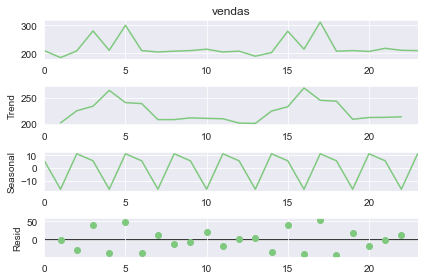

In [73]:
resultado = seasonal_decompose(chocolura['vendas'], period =3)
ax = resultado.plot()

In [78]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido =  resultado.resid

In [79]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


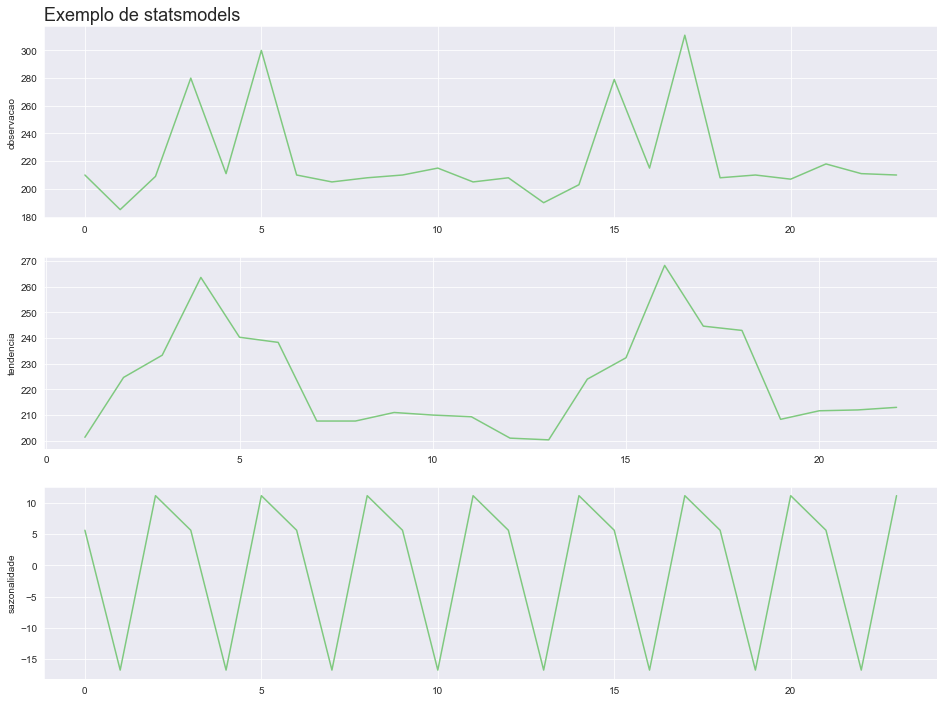

In [82]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de statsmodels')

# Alucel - Análise de vendas

In [84]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [85]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [86]:
print('Quantide de linnhas e colunas' , alucel.shape)
print('Quantidae de dados nules : ' , alucel.isna().sum().sum())

Quantide de linnhas e colunas (61, 2)
Quantidae de dados nules :  0


In [87]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


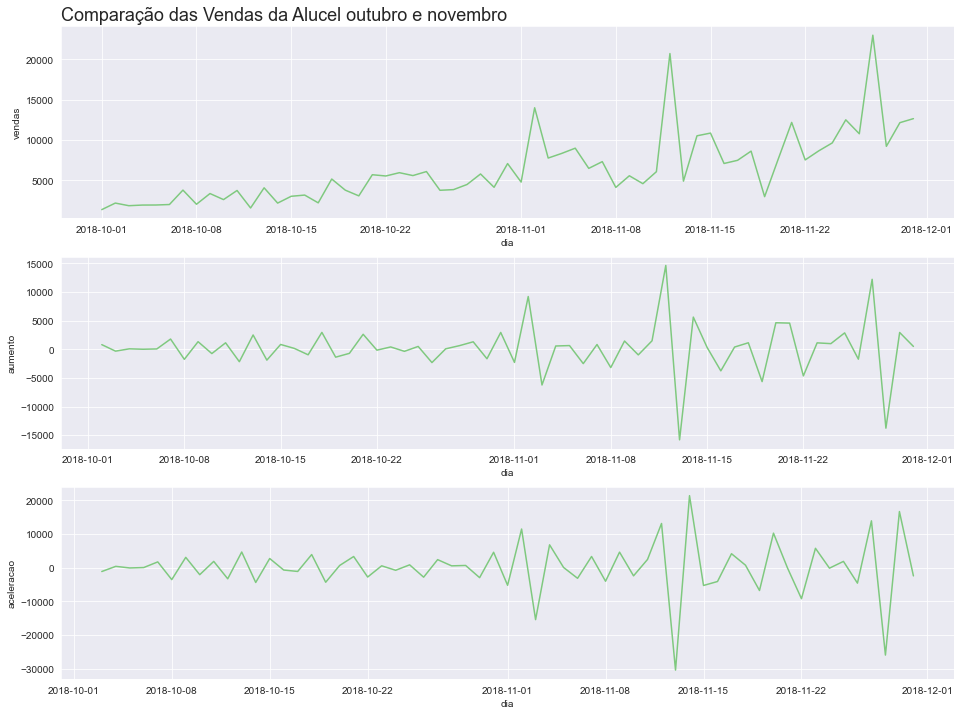

In [88]:
plot_comparacao('dia','vendas','aumento','aceleracao', alucel, 'Comparação das Vendas da Alucel outubro e novembro')

# Média móvel

In [89]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [91]:
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


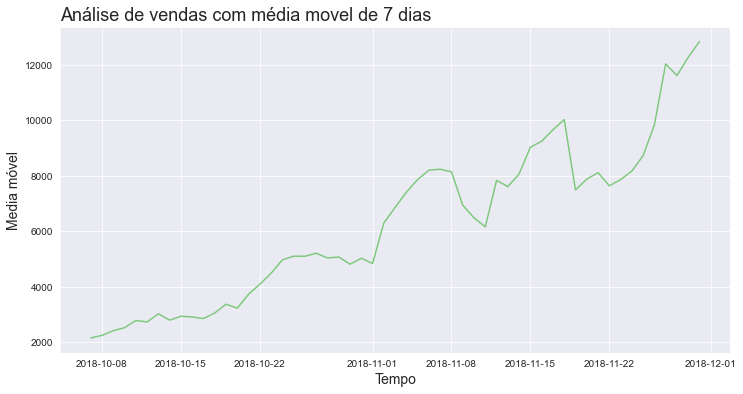

In [92]:
plotar('Análise de vendas com média movel de 7 dias','Tempo', 'Media móvel', 'dia','media_movel', alucel)

In [93]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

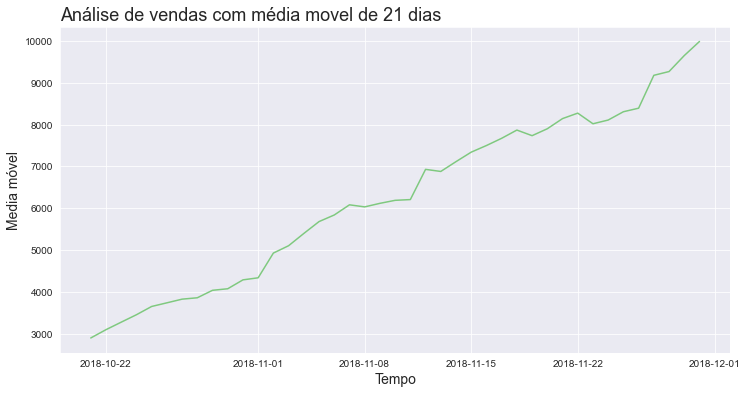

In [95]:
plotar('Análise de vendas com média movel de 21 dias','Tempo', 'Media móvel', 'dia','media_movel_21', alucel)

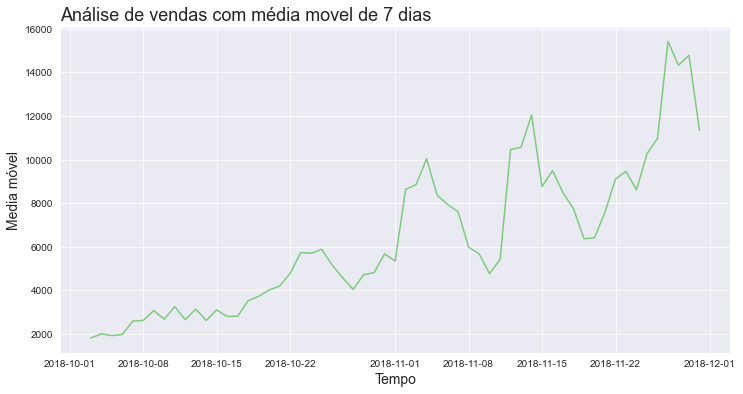

In [97]:
alucel['media_movel_3'] = alucel['vendas'].rolling(3).mean()
plotar('Análise de vendas com média movel de 7 dias','Tempo', 'Media móvel', 'dia','media_movel_3', alucel)

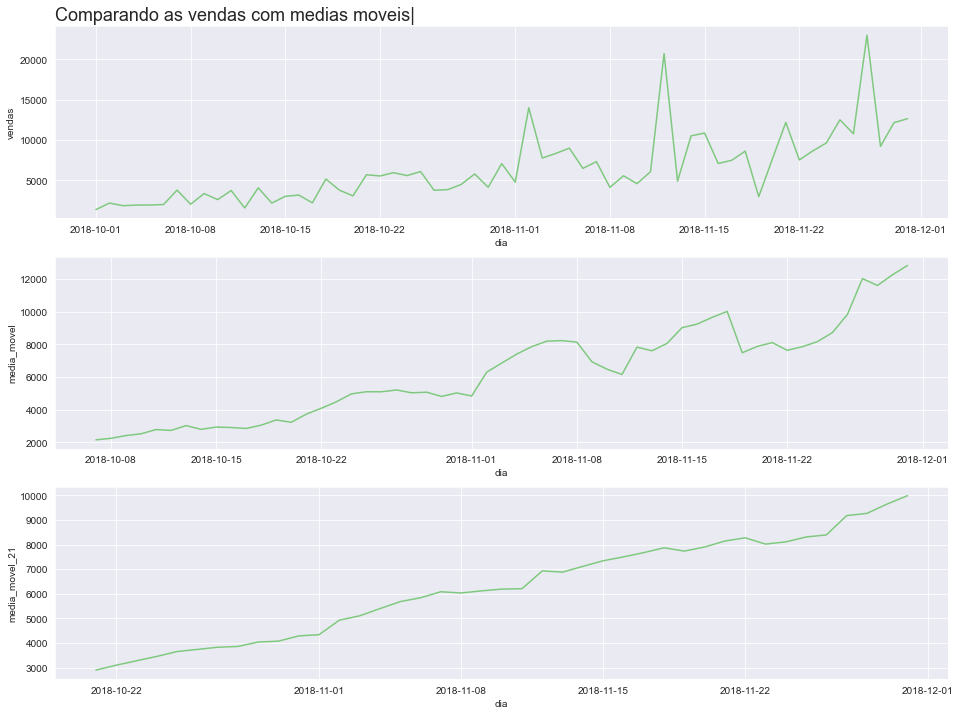

In [98]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com medias moveis|')